*Neural Networks Demo*

We are going to be predicting the likelihood that an e-bay auction is a shilling scheme (this is fraudulent)

In this section, we are going to be covering: 
1. Re-balancing our data
2. Creating a neural network
3. Training our network
4. Making Predictions

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_shill = pd.read_csv("Data/Shill_Bidding.csv")

display(df_shill.head(20))
display(df_shill.info())

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
5,8,900,i***e,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,7,0
6,10,900,m***p,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,7,0
7,12,900,k***a,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1
8,13,2370,g***r,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,7,1
9,27,600,e***t,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,7,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


None

In [7]:
df_shill["Class"].value_counts()

0    5646
1     675
Name: Class, dtype: int64

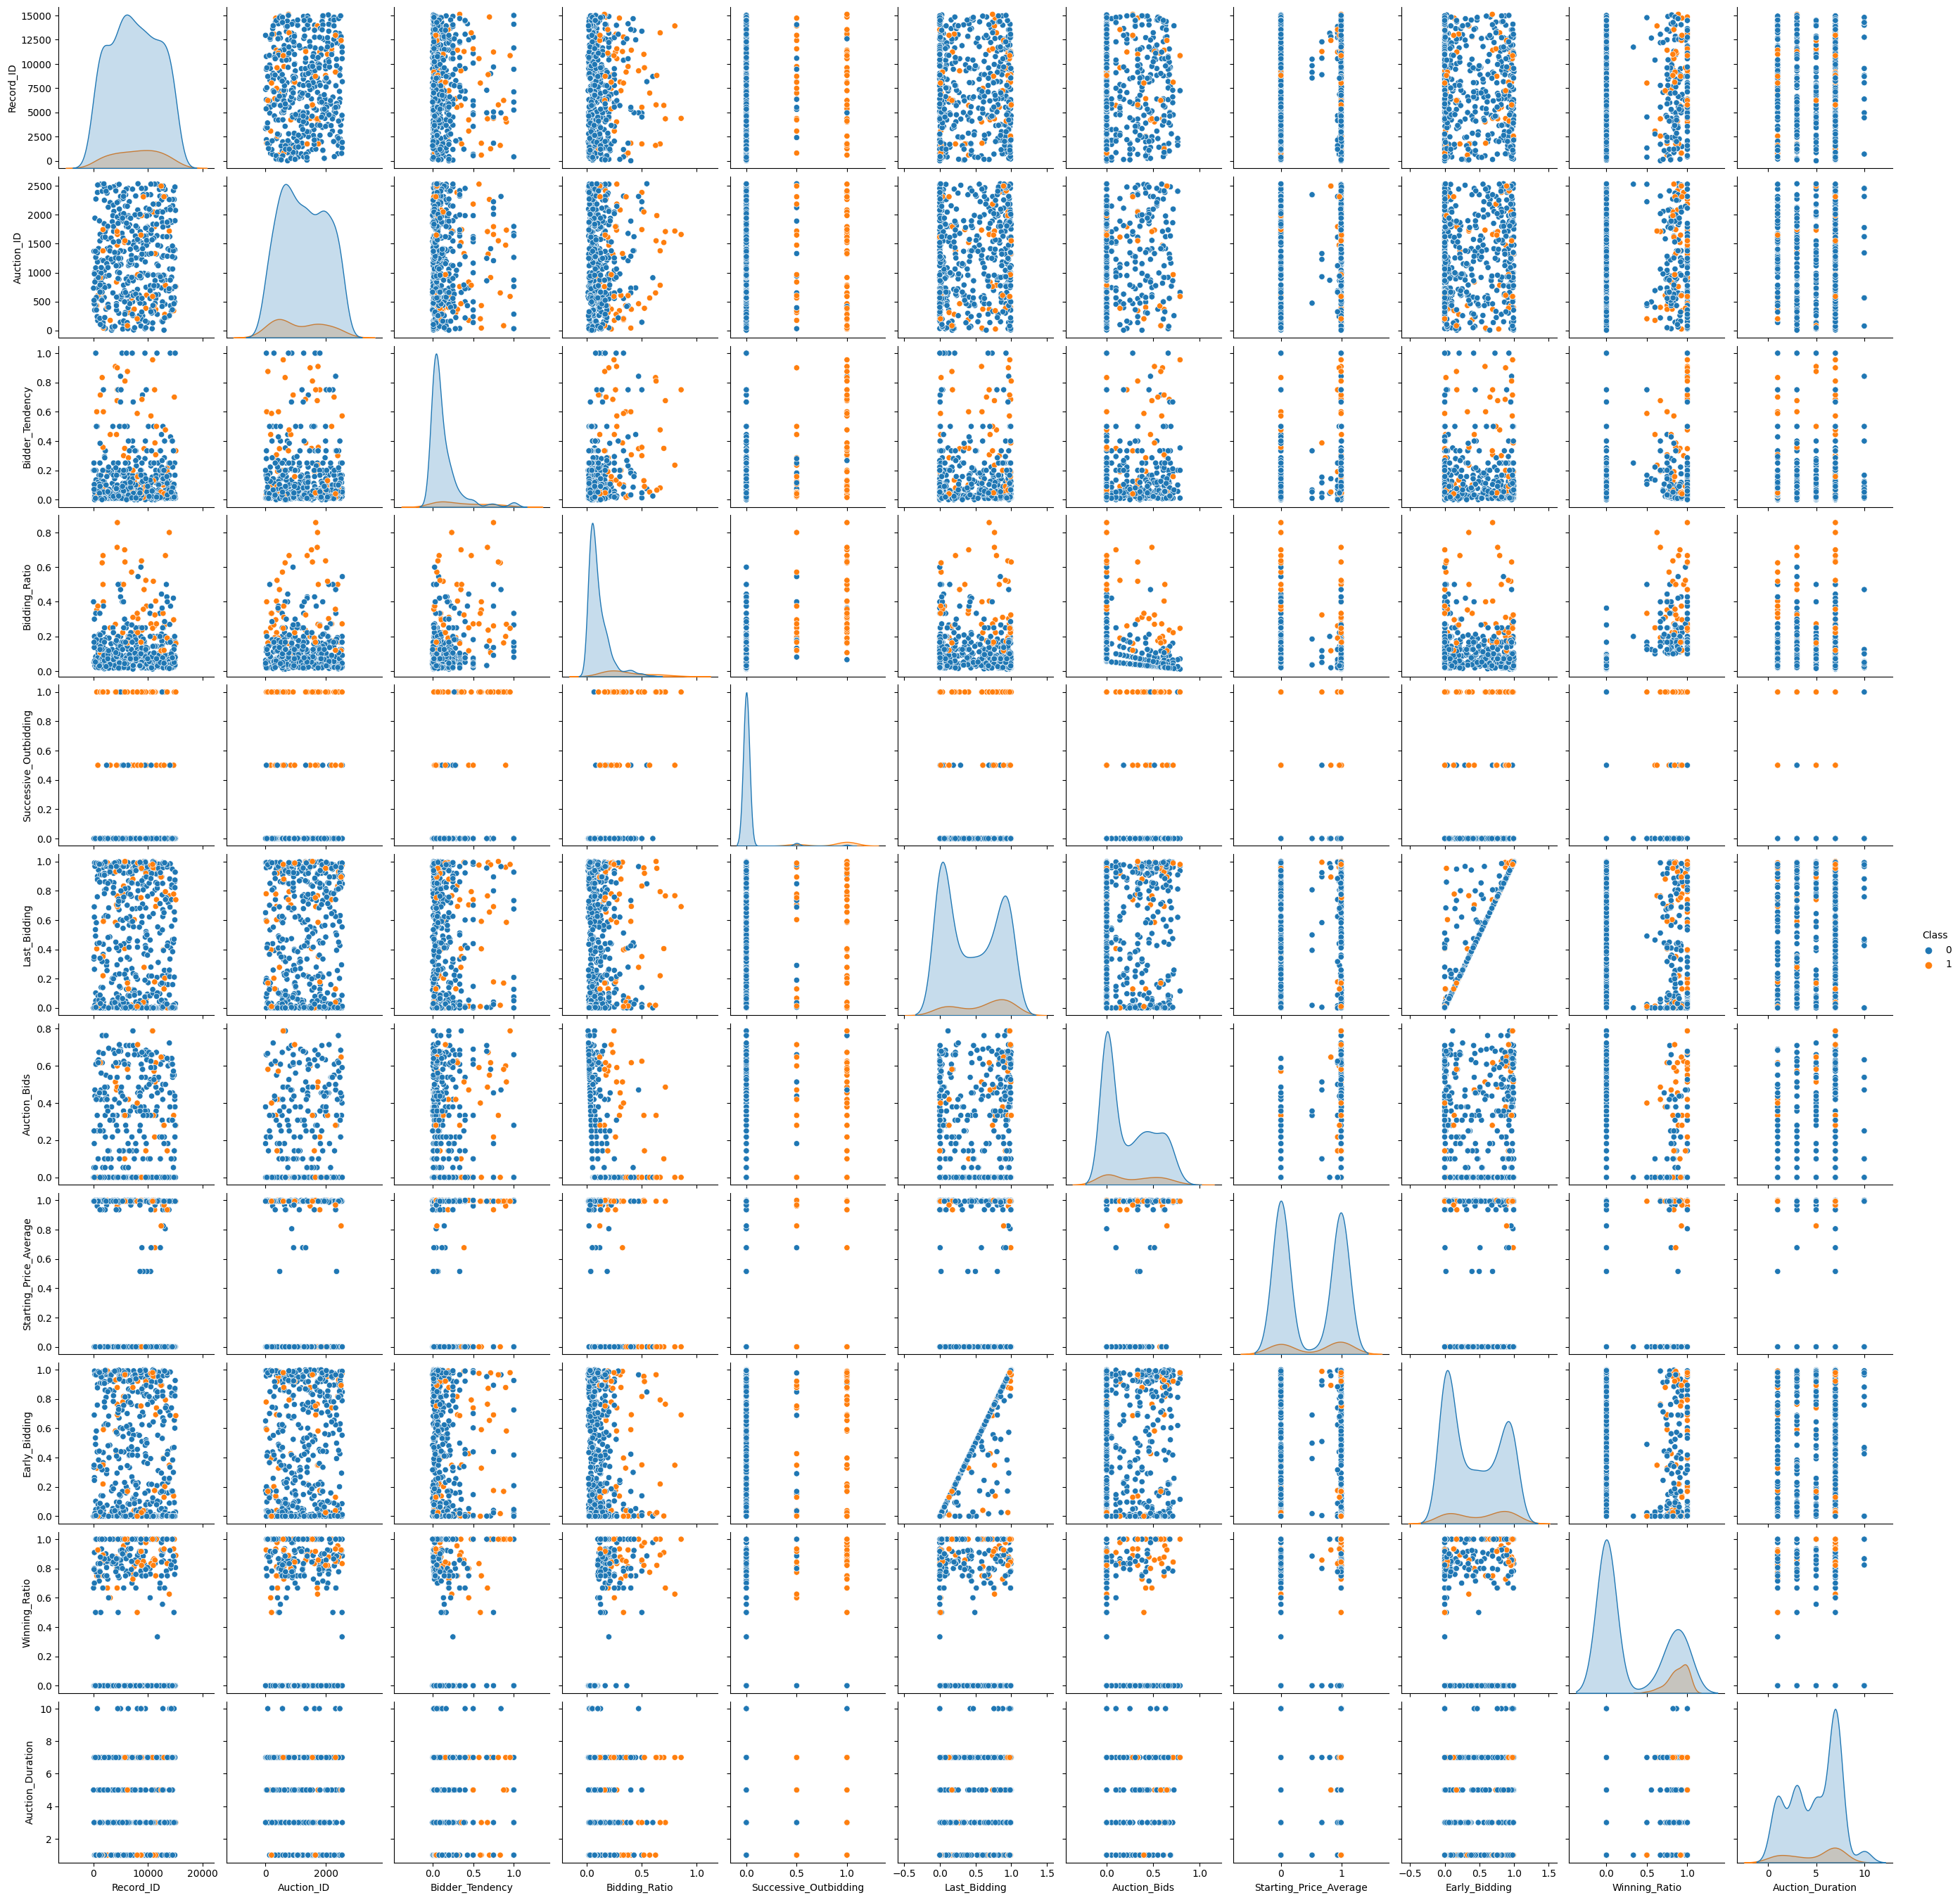

In [8]:
sns.pairplot(data=df_shill.sample(500), hue="Class")

In [9]:
df_balanced = pd.concat([df_shill[df_shill["Class"]==1], df_shill[df_shill["Class"]==0].sample(675)], axis=0)
display(df_balanced.info())
display(df_balanced["Class"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 7 to 1570
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               1350 non-null   int64  
 1   Auction_ID              1350 non-null   int64  
 2   Bidder_ID               1350 non-null   object 
 3   Bidder_Tendency         1350 non-null   float64
 4   Bidding_Ratio           1350 non-null   float64
 5   Successive_Outbidding   1350 non-null   float64
 6   Last_Bidding            1350 non-null   float64
 7   Auction_Bids            1350 non-null   float64
 8   Starting_Price_Average  1350 non-null   float64
 9   Early_Bidding           1350 non-null   float64
 10  Winning_Ratio           1350 non-null   float64
 11  Auction_Duration        1350 non-null   int64  
 12  Class                   1350 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 147.7+ KB


None

1    675
0    675
Name: Class, dtype: int64

In [10]:
display(df_balanced.describe())

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,7604.428889,1236.268889,0.213507,0.224696,0.426296,0.507932,0.243934,0.493304,0.450877,0.593354,4.648889,0.500000
std,4362.318253,740.667354,0.240020,0.192609,0.446896,0.374304,0.253143,0.489332,0.376632,0.419046,2.475016,0.500185
min,2.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3828.250000,554.000000,0.043478,0.074074,0.000000,0.105199,0.000000,0.000000,0.038497,0.000000,3.000000,0.000000
50%,7635.500000,1293.500000,0.114286,0.166667,0.500000,0.554406,0.181818,0.546967,0.422085,0.806452,5.000000,0.500000
75%,11334.750000,1865.250000,0.300000,0.314286,1.000000,0.886719,0.470588,0.993593,0.829266,0.926829,7.000000,1.000000
max,15129.000000,2538.000000,1.000000,1.000000,1.000000,0.999820,0.788235,0.999935,0.999248,1.000000,10.000000,1.000000


In [11]:
scaling_cols = ['Record_ID', 'Auction_ID', 'Auction_Duration']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_nn = df_balanced.copy()
df_nn[scaling_cols] = scaler.fit_transform(df_balanced[scaling_cols])

display(df_nn.describe())
display(df_nn.info())

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,1.350000e+03,1.350000e+03,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1.350000e+03,1350.000000
mean,4.736952e-17,1.276345e-16,0.213507,0.224696,0.426296,0.507932,0.243934,0.493304,0.450877,0.593354,-8.158083e-17,0.500000
std,1.000371e+00,1.000371e+00,0.240020,0.192609,0.446896,0.374304,0.253143,0.489332,0.376632,0.419046,1.000371e+00,0.500185
min,-1.743396e+00,-1.662994e+00,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.474835e+00,0.000000
25%,-8.659566e-01,-9.214956e-01,0.043478,0.074074,0.000000,0.105199,0.000000,0.000000,0.038497,0.000000,-6.664604e-01,0.000000
50%,7.125254e-03,7.729829e-02,0.114286,0.166667,0.500000,0.554406,0.181818,0.546967,0.422085,0.806452,1.419147e-01,0.500000
75%,8.554404e-01,8.495233e-01,0.300000,0.314286,1.000000,0.886719,0.470588,0.993593,0.829266,0.926829,9.502899e-01,1.000000
max,1.725541e+00,1.758162e+00,1.000000,1.000000,1.000000,0.999820,0.788235,0.999935,0.999248,1.000000,2.162853e+00,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 7 to 1570
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               1350 non-null   float64
 1   Auction_ID              1350 non-null   float64
 2   Bidder_ID               1350 non-null   object 
 3   Bidder_Tendency         1350 non-null   float64
 4   Bidding_Ratio           1350 non-null   float64
 5   Successive_Outbidding   1350 non-null   float64
 6   Last_Bidding            1350 non-null   float64
 7   Auction_Bids            1350 non-null   float64
 8   Starting_Price_Average  1350 non-null   float64
 9   Early_Bidding           1350 non-null   float64
 10  Winning_Ratio           1350 non-null   float64
 11  Auction_Duration        1350 non-null   float64
 12  Class                   1350 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 147.7+ KB


None

In [12]:
from sklearn.model_selection import train_test_split

features = df_nn.iloc[:,3:-1]
lbls = df_nn.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(features, lbls, train_size=0.8, test_size=0.2, shuffle=True, random_state=123)

In [13]:
ann_model = tf.keras.models.Sequential()

#Hidden Layers
ann_model.add(tf.keras.layers.Dense(units=12, activation="relu"))
ann_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
ann_model.add(tf.keras.layers.Dense(units=8, activation="relu"))

#Output Layer
ann_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [14]:
ann_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [15]:
ann_model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 633us/step - loss: 0.6638 - accuracy: 0.5278
Epoch 2/100
34/34 [==============================] - 0s 632us/step - loss: 0.6147 - accuracy: 0.5870
Epoch 3/100
34/34 [==============================] - 0s 529us/step - loss: 0.5411 - accuracy: 0.7130
Epoch 4/100
34/34 [==============================] - 0s 441us/step - loss: 0.4360 - accuracy: 0.8843
Epoch 5/100
34/34 [==============================] - 0s 462us/step - loss: 0.3157 - accuracy: 0.9389
Epoch 6/100
34/34 [==============================] - 0s 481us/step - loss: 0.2160 - accuracy: 0.9676
Epoch 7/100
34/34 [==============================] - 0s 456us/step - loss: 0.1493 - accuracy: 0.9852
Epoch 8/100
34/34 [==============================] - 0s 437us/step - loss: 0.1090 - accuracy: 0.9843
Epoch 9/100
34/34 [==============================] - 0s 479us/step - loss: 0.0865 - accuracy: 0.9861
Epoch 10/100
34/34 [==============================] - 0s 492us/step - loss: 0.0745 - accura

In [29]:
def nn_evaluator(y_hat, y_test, modelName):
    from sklearn import metrics

    acc = metrics.accuracy_score(y_test, y_hat)
    prec = metrics.precision_score(y_test, y_hat)
    rec = metrics.recall_score(y_test, y_hat)
    f1 = metrics.f1_score(y_test, y_hat)

    conf_matrix = metrics.confusion_matrix(y_test, y_hat)

    print("\n"*2)
    print("**"*5)
    print(modelName)
    print("**"*5)
    
    print("Accuracy: ", acc)
    print("Precision: ", prec)
    print("Recall: ", rec)
    print("F1 Score: ", f1)
    print("Confusion Matrix: \n", conf_matrix)

    return {"acc": acc, "prec": prec, "recall": rec, "f1_score": f1, "conf_matrix": conf_matrix}

In [30]:
y_pred = ann_model.predict(x_test)
y_hat = (y_pred>=0.5) * 1

y_hat

1/9 [==>...........................] - ETA: 0s

9/9 [==============================] - 0s 646us/step


array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
    

In [31]:
def model_evaluator(model, x_test, y_test, modelName):
    from sklearn import metrics
    y_hat = model.predict(x_test)

    acc = metrics.accuracy_score(y_test, y_hat)
    prec = metrics.precision_score(y_test, y_hat)
    rec = metrics.recall_score(y_test, y_hat)
    f1 = metrics.f1_score(y_test, y_hat)

    conf_matrix = metrics.confusion_matrix(y_test, y_hat)

    print("\n"*2)
    print("**"*5)
    print(modelName)
    print("**"*5)
    
    print("Accuracy: ", acc)
    print("Precision: ", prec)
    print("Recall: ", rec)
    print("F1 Score: ", f1)
    print("Confusion Matrix: \n", conf_matrix)

    return {"model": model, "acc": acc, "prec": prec, "recall": rec, "f1_score": f1, "conf_matrix": conf_matrix}


def classification_helper(feat_train, feat_test, lbl_train, lbl_test):
    #Decision Trees
    from sklearn import tree

    dtc = tree.DecisionTreeClassifier(random_state=0)
    dtc.fit(feat_train, lbl_train)
    dtc_evaluation = model_evaluator(dtc, x_test=feat_test, y_test=lbl_test, modelName="Decision Tree Classifier")


    #Random Forests
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(random_state=1)
    rfc.fit(x_train, y_train)
    rfc_evalution = model_evaluator(rfc, x_test=feat_test, y_test=lbl_test, modelName="Random Forest Classifier")

    #GaussianNB
    from sklearn.naive_bayes import GaussianNB

    nbc = GaussianNB()
    nbc.fit(x_train, y_train)
    nbc_evaluation = model_evaluator(nbc, x_test=feat_test, y_test=lbl_test, modelName="Gaussian Naive Bayes Classifer")

    #K-Neareset Neighbors Classifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    knn_evaluation = model_evaluator(knn, x_test=feat_test, y_test=lbl_test, modelName="K Nearest Neighbor Classifier")

    return {"dtc_eval": dtc_evaluation, "rfc_eval": rfc_evalution, "gauss_eval": nbc_evaluation, "knn_eval": knn_evaluation}

In [32]:
classification_helper(x_train, x_test, y_train, y_test)
nn_evaluator(y_hat=y_hat, y_test=y_test, modelName="Artificial Neural Network")




**********
Decision Tree Classifier
**********
Accuracy:  0.9888888888888889
Precision:  0.9781021897810219
Recall:  1.0
F1 Score:  0.988929889298893
Confusion Matrix: 
 [[133   3]
 [  0 134]]



**********
Random Forest Classifier
**********
Accuracy:  0.9851851851851852
Precision:  0.9710144927536232
Recall:  1.0
F1 Score:  0.9852941176470589
Confusion Matrix: 
 [[132   4]
 [  0 134]]



**********
Gaussian Naive Bayes Classifer
**********
Accuracy:  0.9703703703703703
Precision:  0.9436619718309859
Recall:  1.0
F1 Score:  0.9710144927536231
Confusion Matrix: 
 [[128   8]
 [  0 134]]



**********
K Nearest Neighbor Classifier
**********
Accuracy:  0.9851851851851852
Precision:  0.9710144927536232
Recall:  1.0
F1 Score:  0.9852941176470589
Confusion Matrix: 
 [[132   4]
 [  0 134]]



**********
Artificial Neural Network
**********
Accuracy:  0.9888888888888889
Precision:  0.9781021897810219
Recall:  1.0
F1 Score:  0.988929889298893
Confusion Matrix: 
 [[133   3]
 [  0 134]]


{'acc': 0.9888888888888889,
 'prec': 0.9781021897810219,
 'recall': 1.0,
 'f1_score': 0.988929889298893,
 'conf_matrix': array([[133,   3],
        [  0, 134]])}